# ORIE 4580/5580/5581 Assignment 4

#### Students: S. Ulam (su001) and J. von Neuman (jvn001)

### Github link: [example Github link](https://github.com/SidBanerjee/ORIE4580-Simulation/blob/main/Notebooks/Unit0-Intro_Demos.ipynb)


### Instructions


* Due Thursday October 2, at 11.59pm on Gradescope.
* Assignment .ipynb files available for download on [Canvas](https://canvas.cornell.edu/courses/80773#:~:text=Assignments-,Assignments,-Assignments%20module%20publish).
* Do all your work in provided notebook (text answers typeset in markdown; show all required code and generate plots inline), and then generate and submit a pdf.
* Ideally do assignments in groups of 2, and submit a single pdf with both names
* Please show your work and clearly mark your answers.
* You can use any code fragments given in class, found online (for example, on StackOverflow), or generated via Gemini/Claude/ChatGPT (you are encouraged to use these for first drafts) **with proper referencing**.
* You can also discuss with others (again, please reference them if you do so); but you must write your final answers on your own as a team.




### Suggested reading

Chapters 5 (sections 5.1, 5.2 and 5.3) and 6, as well as chapter 11 (to revise again what we discussed in class about confidence intervals) of [Simulation by Ross](https://catalog.library.cornell.edu/catalog/12745977).

In [2]:
import numpy as np
import matplotlib.pyplot as plt

<hr><hr>

# Question 1: The Inspection paradox (30 pts)

Have you ever felt like you wait too long for elevators, taxis, buses, etc.? Guess what - you may be right!

We are going to simulate a number of train and passenger arrivals at a station, and try to measure the time each passenger needs to wait for a train. To do this, first generate a stream of 10,000 train passengers, each of whom have an independent arrival time which is uniformly distributed over an interval of 1,000 minutes (i.e., passenger $i$ arrives at time $T_i\sim [0,1000]$. Sort the passengers by arrival time, and use this resulting vector for all subsequent parts.

<hr>

**(a)** Suppose trains arrive at the station deterministically every 10 minutes. Assume each train has infinite capacity, so that everyone waiting at the station when a train arrives can get on; also assume that passengers get on the train instantaneously. Estimate the expected time (with CIs) that any *randomly chosen* passenger spends waiting at the station for the next train.

<hr>

## Ans.

In [32]:
import numpy as np
import math

#Generate arrival time list for 10,000 arrivals
arrival_times1 = [0]*10000

#Append randomized arrival times [0,1000] to arrival times list
for i in range(len(arrival_times1)):
    arrival_times1[i] = 1000 * np.random.uniform(0, 1)

#Sort in increasing order of arrival time
arrival_times1.sort()

#print(arrival_times[:10])

#Generate train arrival time list
train_times1 = [0]*100
train_times1[0] = 0
j = 1

#Append the time that the train arrived to the station
for j in range(100):
    train_times1[j] = train_times1[j-1] + 10

#print(train_times)

#Generate wait time list
wait_times1 = [0]*10000

a = 0
t = 0

#Calculate wait time according to arrival time and the time of the next train
while a < len(arrival_times1):
    if train_times1[t] > arrival_times1[a]:
        wait_times1[a] = train_times1[t] - arrival_times1[a]
    else:
        t += 1
        wait_times1[a] = train_times1[t] - arrival_times1[a]
    a += 1

#Sort wait times in increasing order
wait_times1.sort()

#Calculate summary statistics
mean = np.mean(wait_times1)
std = np.std(wait_times1)


#Print out mean, sd, and 95% CI
print(f"Mean wait: {mean:.4f} min")
print(f"Standard Deviation: {std:.4f} min")

CI_Lower = mean - 1.96*(std/math.sqrt(10000))
CI_Upper = mean + 1.96*(std/math.sqrt(10000))

print(f"95% Confidence Interval: [{CI_Lower: .4f}, {CI_Upper: .4f}]")

#print(wait_times[9990:10000])

Mean wait: 4.9928 min
Standard Deviation: 2.8845 min
95% Confidence Interval: [ 4.9362,  5.0493]


<hr>

**(b)** Next, assume trains arrive at the station with *inter-arrival* time (i.e., time between two trains) distributed according to an exponential distribution with mean 10 minutes. Again, use your vector of passenger arrival times to estimate the expected waiting time for a randomly chosen passenger.

<hr>

## Ans.

In [33]:
import numpy as np, math

#Chat GPT prompt:
#generate train arrival times according to exp(10)
#store in list
#when sum of train arrivals > 1000 don't append this value and stop there
#calculate prefix sum for each train arrival time (each entry will be equal to the time at which this train arrives [0,1000])
#include a dummy train time at time 0 (no passengers will catch this train but will be used in formula to calculate arrival time)
#will need a while loop which loops through the current passenger arrival times
#each passenger wait time will be calculated compared to the next train time
#once passenger arrival time is > next arrival time, switch to the next train arrival time (no negative wait times)
#this is where the index of the train arrival time += 1 so that the passenger wait times are being compared to the next future train time
#general formula: train_arrival_time[i] - passenger_arrival_time[j] 
#each iteration of the loop will be for a singular passenger
#pay careful attention that if train train_arrival_time[i] < passenger_arrival_time[j], the index of the train_arrival_time i+=1 until train train_arrival_time[i] > passenger_arrival_time[j]




#Arrival times computed above
n = len(arrival_times1)
mean_gap = 10.0
horizon = 1000.0

#Generate train times. Append to a list with the current arrival time of each train with another list corresponding to the inter-train arrival time
#Generated 1 train past 1000 so that all arrivals got on a train
train_times2 = [0.0]
train_times_sample = [0.0]
counter = 0 
while train_times2[-1] < horizon:
    gap = np.random.exponential(scale=mean_gap)
    train_times_sample.append(gap)
    train_times2.append(train_times2[-1] + gap)

#Compute wait times of each arrival
wait_times2 = np.empty(n)
t = 1  
for i in range(n):
    # advance t until next train is strictly AFTER arrival (0 wait if equal)
    while train_times2[t] < arrival_times1[i]:
        t += 1
    wait_times2[i] = train_times2[t] - arrival_times1[i]

#Calculate summary statistics of each arrival
mean = wait_times2.mean()
std  = wait_times2.std(ddof=1)     
se   = std / math.sqrt(n)
CI_Lower = mean - 1.96 * se
CI_Upper = mean + 1.96 * se

#Print out important characteristics
print(f"Passengers: {n}")
print(f"Trains generated (incl. dummy 0 & sentinel): {len(train_times2)}")
print(f"Mean wait: {mean:.4f} min")
print(f"Std dev:  {std:.4f} min")
print(f"SE:       {se:.5f} min")
print(f"95% CI:   [{CI_Lower:.4f}, {CI_Upper:.4f}]")

Passengers: 10000
Trains generated (incl. dummy 0 & sentinel): 98
Mean wait: 9.7324 min
Std dev:  8.8660 min
SE:       0.08866 min
95% CI:   [9.5586, 9.9061]


<hr>

**(c)** (Hopefully, you found the answer in part (b) to be different, and surprisingly so, compared to part (a).)

The train service claims that there is a train every $10$ minutes on average. In part (a), this is clearly the case, but is it so in part (b) as well? To understand this, use your data from part (b) to compute an empirical estimate with CIs for the inter-arrival times between trains.

<hr>

In [34]:
#Discard first holder train time at 0 
train_times_sample = train_times_sample[1:]

#Print out train arrival inter-arrival times
mean = np.mean(train_times_sample)
std = np.std(train_times_sample)    # sample std for CI
se = std / math.sqrt(len(train_times2))
CI_Lower = mean - 1.96 * se
CI_Upper = mean + 1.96 * se

#Print out summary statistics
print(f"Mean Train Time Arrival: {mean:.4f} min")
print(f"Standard Deviation: {std:.4f} min")
print(f"95% Confidence Interval: [{CI_Lower: .4f}, {CI_Upper: .4f}]")

Mean Train Time Arrival: 10.4867 min
Standard Deviation: 9.8738 min
95% Confidence Interval: [ 8.5318,  12.4416]


<hr>

**(d)** To understand what may be happening between parts (a) and (b), use the data from the simulations in parts (a) and (b) to estimate the average inter-arrival time between trains that each passenger experiences in each case. In other words, if passenger $i$ gets on train number $n$, thn we want to define his inter-arrival time $I_i$ to be the difference $A_n~-~A_{n-1}$ where $A_n$ is the arrival time of train $n$.

Compute the sample mean and CI of the interval $I_i$ for a randomly chosen passenger $i$ in each of the two settings. How are these related to the waiting time estimates you got in each part? Can you explain this?

<hr>

## Ans.

In [35]:
"""
Chat GPT Prompt:
Create a confidence interval for all of the arrival times in the train_times1 list (calculate mean and sample standard deviation for the 100 arrival times and calcualte
95% confidence interval

Next, choose a random i in range 0 to len(arrival_times1). Do this by rounding down for U[0,1]*len(arrival_times1). Look at the arrival_time1 of the index of that random
index. Next, use this arrival time to find the train_times1 that are greater than and less than that arrival_time1. Essentially, find the train inter-arrival window that 
randomly selected passenger falls into. Lastly, calculate the length of the interval at which this passenger arrives at and display it.

Create a confidence interval for all of the arrival times in the train_times2 ist (not train_times1) (calculate mean and sample standard deviation for the 100 arrival times and calcualte
95% confidence interval

Next, choose a random i in range 0 to len(arrival_times1). Do this by rounding down for U[0,1]*len(arrival_times1). Look at the arrival_time1 of the index of that random
index. Next, use this arrival time to find the train_times2 that are greater than and less than that arrival_time1. Essentially, find the train inter-arrival window that 
randomly selected passenger falls into. Lastly, calculate the length of the interval at which this passenger arrives at and display it.
"""

import numpy as np
import math
import bisect
import random

# --- helpers ---
def inter_arrivals(train_times):
    """Return inter-arrival gaps from raw cumulative train times."""
    t = np.asarray(train_times, dtype=float)
    if t.ndim != 1 or len(t) < 2:
        raise ValueError("train_times must be a 1D sequence with length >= 2.")
    if not np.all(np.diff(t) >= 0):
        raise ValueError("train_times must be non-decreasing (sorted).")
    return np.diff(t)

def ci_95(samples, use_t=False):
    """
    95% CI for the mean using sample std (ddof=1).
    By default uses Normal(1.96); set use_t=True to use Student-t (requires scipy).
    """
    x = np.asarray(samples, dtype=float)
    n = x.size
    if n < 2:
        raise ValueError("Need at least 2 samples for a CI.")
    mean = x.mean()
    std = x.std(ddof=1)
    se = std / math.sqrt(n)
    if use_t:
        from scipy import stats
        crit = stats.t.ppf(0.975, df=n-1)
    else:
        crit = 1.96
    return mean, std, (mean - crit*se, mean + crit*se)

def passenger_interval_length(arrival_time, train_times):
    """
    Given a passenger arrival time and sorted train_times, return:
    (prev_train_time, next_train_time, interval_length).
    Requires there to be a next train after arrival_time.
    """
    idx_next = bisect.bisect_right(train_times, arrival_time)
    if idx_next == 0:
        raise ValueError("arrival_time precedes the first train; need an initial train at/before 0.")
    if idx_next == len(train_times):
        raise ValueError("No train after arrival_time; append a sentinel train beyond the horizon.")
    prev_t = train_times[idx_next - 1]
    next_t = train_times[idx_next]
    return prev_t, next_t, (next_t - prev_t)

# ---------- Part for train_times1 ----------
# 1) Inter-arrival times & 95% CI
gaps1 = inter_arrivals(train_times1)
mean1, std1, (lo1, hi1) = ci_95(gaps1, use_t=False)  # set True for Student-t if you prefer

print("train_times1 (inter-arrivals):")
print(f"  n = {len(gaps1)}")
print(f"  mean gap = {mean1:.4f}")
print(f"  sample std = {std1:.4f}")
print(f"  95% CI for mean gap = [{lo1:.4f}, {hi1:.4f}]")

# 2) Random passenger and the enclosing train interval in train_times1
n_pass = len(arrival_times1)
i_rand = int(random.random() * n_pass)  # floor(U*len)
arrival_rand = arrival_times1[i_rand]

prev1, next1, length1 = passenger_interval_length(arrival_rand, train_times1)
print("\nRandom passenger (using arrival_times1) vs train_times1:")
print(f"  random index i = {i_rand}, arrival_time = {arrival_rand:.4f}")
print(f"  previous train at {prev1:.4f}, next train at {next1:.4f}")
print(f"  interval length = {length1:.4f}")

# ---------- Part for train_times2 ----------
# 3) Inter-arrival times & 95% CI
gaps2 = inter_arrivals(train_times2)
mean2, std2, (lo2, hi2) = ci_95(gaps2, use_t=False)

print("\ntrain_times2 (inter-arrivals):")
print(f"  n = {len(gaps2)}")
print(f"  mean gap = {mean2:.4f}")
print(f"  sample std = {std2:.4f}")
print(f"  95% CI for mean gap = [{lo2:.4f}, {hi2:.4f}]")

# 4) Random passenger and the enclosing train interval in train_times2
prev2, next2, length2 = passenger_interval_length(arrival_rand, train_times2)
print("\nRandom passenger (same arrival) vs train_times2:")
print(f"  arrival_time = {arrival_rand:.4f}")
print(f"  previous train at {prev2:.4f}, next train at {next2:.4f}")
print(f"  interval length = {length2:.4f}")

train_times1 (inter-arrivals):
  n = 99
  mean gap = 10.0000
  sample std = 0.0000
  95% CI for mean gap = [10.0000, 10.0000]

Random passenger (using arrival_times1) vs train_times1:
  random index i = 3144, arrival_time = 315.3025
  previous train at 310.0000, next train at 320.0000
  interval length = 10.0000

train_times2 (inter-arrivals):
  n = 97
  mean gap = 10.4867
  sample std = 9.9251
  95% CI for mean gap = [8.5116, 12.4619]

Random passenger (same arrival) vs train_times2:
  arrival_time = 315.3025
  previous train at 293.1588, next train at 322.0691
  interval length = 28.9103


As you can see, the confidence interval for train arrival time is $[10, 10]$, insinuating that the train arrives exactly at 10 minutes, just as the question states.  

Understanding that passengers arrive uniformly, it makes sense that the wait time would be the mean arrival time divided by $2 \approx 5$ minutes.  

However, for the exponential case, the inter-arrival time mean is approximately $[7, 11]$, where the mean arrival time is around $9$ minutes for our given sample (theoretically it should be $10$).  

Due to the right-skewness of the exponential distribution, this will result in the wait time for a given passenger not being equal to the inter-arrival time divided by $2$, but rather skewed towards the mean of around $9$, which is exactly what the previous simulation showed.


**(e) (Optional for all students)** Based on your previous parts, can you come up with an explanation for what is going on?  

For part (a), where trains arrive every 10 minutes, it makes sense that the expected wait time will be right around 5 minutes.

However, for part (b), the exponential distribution with mean $10$ minutes, i.e. $X \sim \text{Exp}(\lambda = 1/10)$, naturally has a lower bound at $0$, whereas in theory there is no upper bound. This means the wait times and average train arrival times can potentially be very right-skewed.

---

I can prove the case of right skewness inductively. Exponential functions are monotonically decreasing, and so once I prove asymmetry that points to right skewness for a single area, the case extends throughout the rest of the function.

Let’s look at the inverse CDF of $0.01$ and $0.99$ for $X \sim \text{Exp}(1/10)$:

$$
F^{-1}(0.01) \approx 0.10, \quad F^{-1}(0.99) \approx 46.05.
$$

The mean is $\mathbb{E}[X] = 10$.

$$
\big| \, \mathbb{E}[X] - F^{-1}(0.01) \, \big| = 9.9, 
\quad 
\big| \, \mathbb{E}[X] - F^{-1}(0.99) \, \big| = 36.05.
$$

As you can see, the deviation from the mean is far larger in the upper tail, which indicates **right skewness** and the presence of outliers that “drag” the average wait time above the $5$ minutes seen in case (a).

<hr><hr>

# Question 2: Generating random samples in some given set (20 pts)

<hr>

**(a)** We want to sample points which are uniformly distributed in the set  $\mathcal{S} = \{(x,y)| x\in \mathbb{R}, y \in [0,e^{-x^2/2}]\}$ (i.e., between the lines $y=0$ and $y=e^{-x^2/2}$). Generate 1000 independent samples $(X_i,Y_i)$, and plot them using a scatterplot, along with the lines $y=0$ and $y=e^{-x^2/2}$.

(Hint: Try to 'reverse' what we do in Acceptance-Rejection).

<hr>

## Ans.

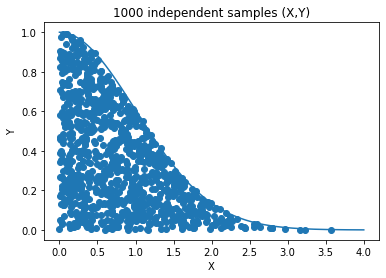

In [156]:
np.random.seed(123)
x = np.random.normal(0, 1, 1000)
x[x < 0] = x[x < 0] * -1
y = np.random.uniform(0, np.exp(-x**2 / 2))
plt.scatter(x, y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('1000 independent samples (X,Y)')
z = np.linspace(0, 4, 1000)
f_z = np.exp(-z**2 / 2)
plt.plot(z, f_z)
plt.show()

<hr>

**(b)** Next, suppose we want to sample points which are uniformly distributed on the set $\{(x,y)\in\mathbb{R}^2|x^2+y^2 = 1\}$ (i.e., on the *circumference* of the unit circle). One way to do so may be to generate points $(U_i,V_i)$ uniformly in $[-1,1]^2$ (like in the first homework), and then *project* them to the circle, i.e., take $(X_i,Y_i) = \left(\frac{U_i}{\sqrt{U_i^2+V_i^2}},\frac{V_i}{\sqrt{U_i^2+V_i^2}}\right)$. Generate $1000$ points in this way, and plot them using a scatter plot.

Are these uniformly distributed on the circumference of the circle? Try checking the histogram of their angles (i.e., the histogram of $\theta_i = \tan^{-1}(Y_i/X_i)$).

<hr>

## Ans.

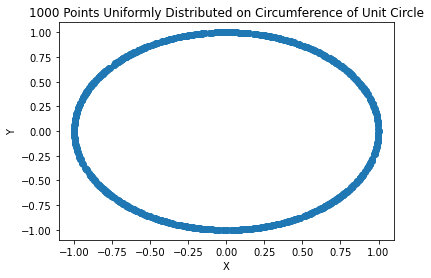

In [158]:
np.random.seed(123)
u = np.random.uniform(-1, 1, 1000)
v = np.random.uniform(-1, 1, 1000)
X = u / np.sqrt(u ** 2 + v ** 2)
Y = v / np.sqrt(u ** 2 + v ** 2)
plt.scatter(X,Y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('1000 Points Uniformly Distributed on Circumference of Unit Circle')
plt.show()

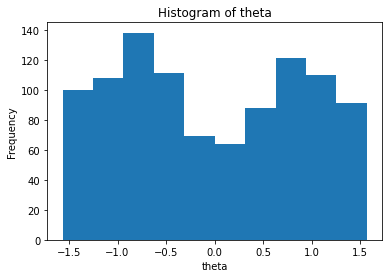

In [159]:
theta = np.arctan(Y / X)
plt.hist(theta)
plt.xlabel('theta')
plt.ylabel('Frequency')
plt.title('Histogram of theta')
plt.show()

Based on the histogram of $\theta$, these points do not appear to be uniformly distributed on the circumference of the unit circle.

<hr>

**(c)** Next, generate points $(Z_i,W_i)$ as independent standard normals (i.e., $(Z_i,W_i)\sim \mathcal{N}(0,I_2)$), and again project them to the circle, i.e., take $(X_i,Y_i) = \left(\frac{Z_i}{\sqrt{Z_i^2+W_i^2}},\frac{W_i}{\sqrt{Z_i^2+W_i^2}}\right)$. Generate $1000$ points in this way, and plot them using a scatter plot.

Are these uniformly distributed on the circumference of the circle? Again, check the histogram of their angles $\theta_i$. Can you explain the difference between parts (b) and (c)?

<hr>

## Ans.

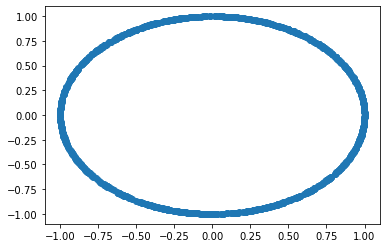

In [154]:
np.random.seed(123)
w = np.random.normal(0, 1, 1000)
z = np.random.normal(0, 1, 1000)
X = z / np.sqrt(z ** 2 + w ** 2)
Y = w / np.sqrt(z ** 2 + w ** 2)
plt.scatter(X, Y)
plt.show()

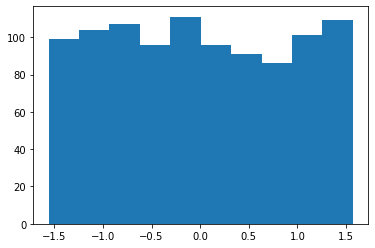

In [155]:
theta = np.arctan(Y / X)
plt.hist(theta)
plt.show()

Based on the histogram of $\theta$, these points appear to be uniformly distributed on the circumference of the unit circle.

In part (b), when we project uniform points from the square $[-1,1]^2$ onto the unit circle, 
the resulting angles are not uniformly distributed. This happens because the unit square 
does not have rotational symmetry. Essentially, points near the corners are underrepresented relative 
to points near the axes. After projection, the density of angles $\theta$ is biased, 
and the histogram shows peaks near $0, \tfrac{\pi}{2}, \pi, \tfrac{3\pi}{2}$. 
Thus, the circumference is not sampled uniformly.

In part (c), we start with independent standard normals 
$(Z_i, W_i) \sim \mathcal{N}(0, I_2)$. The joint Gaussian distribution is rotationally symmetric, 
since its density depends only on $z^2 + w^2$, not on the angle. Hence, the projected points 
$(X_i, Y_i)$ are truly uniform on the circumference, and the histogram of their angles 
$\theta_i$ is flat.

<hr><hr>

# Question 3: Multivariate normals, and some finance (20 points)


Assume the following means and covariance matrix for the net annual returns (annual returns after accounting for inflation) on three investments:

$$\boldsymbol{\mu}=
\begin{bmatrix}
    \mu_{\text{U.S. stocks}}\\
    \mu_{\text{U.S. bonds}}\\
    \mu_{\text{EM bonds}}
\end{bmatrix}=
\begin{bmatrix}
    0.14 \\
    0.07 \\
    0.16\\
\end{bmatrix},$$

Moreover, we have $\sigma^2_{\text{U.S. stocks}}=0.0625, \sigma^2_{\text{U.S. bonds}}=0.01$ and $\sigma^2_{\text{EM bonds}}=0.09$. Assuming all three instruments are independent of each other, what is the probability that all three financial products simultaneously yield a positive return?


<hr>

## Ans.

<hr>
** Ans **

$$
\begin{aligned}
\text{Returns on US Stocks} &:= S \sim N(0.14,\,0.0625), \\
\text{Returns on US Bonds} &:= B \sim N(0.07,\,0.01), \\
\text{Returns on EM Bonds} &:= E \sim N(0.16,\,0.09). \\
\\
\text{Standard deviations:} \quad 
\sigma_S &= 0.25, \;\; \sigma_B = 0.1, \;\; \sigma_E = 0.3. \\
\\
\text{Z-scores for threshold 0:} \quad
z_S = \tfrac{0-\mu_S}{\sigma_S} = \tfrac{-0.14}{0.25} = -0.56, \\
z_B = \tfrac{-0.07}{0.1} = -0.70, \\
z_E = \tfrac{-0.16}{0.3} \approx -0.5333. \\
\\
\text{Probabilities each is positive:} \quad
P(S>0) = 1 - \Phi(z_S) = 1 - \Phi(-0.56), \\
P(B>0) = 1 - \Phi(z_B) = 1 - \Phi(-0.70), \\
P(E>0) = 1 - \Phi(z_E) = 1 - \Phi(-0.5333). \\
\\
\text{Numerical values:} \quad
P(S>0) \approx 1 - 0.2877 = 0.7123, \\
P(B>0) \approx 1 - 0.2420 = 0.7580, \\
P(E>0) \approx 1 - 0.2964 = 0.7036. \\
\\
\text{Therefore:} \quad
P(\text{All 3 > 0}) 
= P(S>0)\,P(B>0)\,P(E>0) \\
&\approx 0.7123 \times 0.7580 \times 0.7036 \\
&\approx 0.379.
\end{aligned}
$$



<hr>

**(b)** Next, assume that the assets are not independent, but rather, have covariance matrix
$$\boldsymbol{\Sigma}=
\begin{bmatrix}
    0.0625 & -0.01 & 0.0375 \\
    -0.01 & 0.01 & -0.015 \\
    0.0375 & -0.015 & 0.09
\end{bmatrix}.$$

Using simulation, estimate the probability that all three financial products simultaneously yield a positive return.
For the purposes of this problem, you are **not allowed** to use the Python function ${\tt numpy.random.multivariate\_normal}$, but rather, should generate *independent* normal rvs, and then apply the method(s) discussed in class.
In particular, you can compute the Cholesky decomposition of the covariance matrix using the Python function ${\tt scipy.linalg.cholesky(sigma, lower=True)}$.
<hr>

## Ans.



In [36]:
"""
Used Chat to generate Cholesky decompositon code and code to sample a matrix corresponding to 1000 3x1 vectors with entries ~ N(0,1)
Used code snipped from homework three to generate N(0,1) from the LaPlace distribution using acceotance rejection and the inverse transform method to sample from the
the LaPlace distribution
"""

def cholesky_decomposition(matrix):
    matrix = np.array(matrix, dtype=float)
    return np.linalg.cholesky(matrix)  # returns lower-triangular L

# target covariance and mean
cov_matrix = np.array([[0.0625, -0.01,  0.0375],
                       [-0.01,   0.01, -0.015 ],
                       [0.0375, -0.015, 0.09  ]], dtype=float)
L = cholesky_decomposition(cov_matrix)
mean_array = np.array([0.14, 0.07, 0.16], dtype=float)

# standard normal via Laplace rejection sampler
def p(x): return (1/np.sqrt(2*np.pi)) * np.exp(-0.5*x**2)
def q(x): return 0.5 * np.exp(-np.abs(x))
k_star = np.sqrt(2/np.pi) * np.exp(0.5)

def sample_normal_via_laplace(n, k=k_star, seed=None):
    rng = np.random.default_rng(seed)
    samples = []
    while len(samples) < n:
        # propose from Laplace(0,1) by inverse CDF
        u = rng.random()
        x_prop = np.log(2*u) if u < 0.5 else -np.log(2*(1-u))
        # accept-reject
        if rng.random() <= p(x_prop) / (k * q(x_prop)):
            samples.append(x_prop)
    return np.array(samples, dtype=float)

# generate 1000x3 iid N(0,1)
N = 1000
Z = np.column_stack([
    sample_normal_via_laplace(N, seed=123),
    sample_normal_via_laplace(N, seed=456),
    sample_normal_via_laplace(N, seed=789),
])

# correlate and shift mean: X ~ N(mean_array, cov_matrix)
samples = Z @ L.T + mean_array  # shape (1000, 3)

# fraction with all components > 0
positive_pct = (samples > 0).all(axis=1).mean()
print(f"% of samples with all security returns > 0: {positive_pct:.3f}")

% of samples with all security returns > 0: 0.344


<hr><hr>

# Question 4: Covariance and copulas (30 points)

In general (i.e., apart from multivariate normals), *there is no closed form formula for generating rvs with given marginals and given covariance matrix*. However, a popular heuristic is the so-called *Gaussian copula trick*, which is widely used in finance. In this question, we will try and get a sense of how we can generate correlated uniforms, and how the Gaussian copula trick works.

<hr>

**(a)** We will first try and make a method for generating two correlated uniform random variables $V_1$, $V_2$ with mean $\mathbb{E}[V_1]=\mathbb{E}[V_2]=0$, variance $Var(V_1)=Var(V_2)=1$, and covariance $Cov( V_1, V_2 ) = \sigma_{12}$ (for some given $\sigma_{12}\geq 0$).

For what $\alpha,\beta\in\mathbb{R}$ does a uniform distribution on $[\alpha,\beta]$ have mean $0$ and variance $1$.

<hr>

## Ans.

For a uniform random variable $U \sim \text{Uniform}(\alpha, \beta)$:

- Mean:  
  $E[U] = \frac{\alpha + \beta}{2}$  

- Variance:  
  $\text{Var}(U) = \frac{(\beta - \alpha)^2}{12}$  

We want $E[U] = 0$ and $\text{Var}(U) = 1$.

Mean condition:
$\frac{\alpha + \beta}{2} = 0 \;\;\;\Rightarrow\;\; \alpha = -\beta$

Variance condition:
$\frac{(\beta - \alpha)^2}{12} = 1$  
$\frac{(2\beta)^2}{12} = 1$  
$\frac{4\beta^2}{12} = 1$  
$\beta^2 = 3 \;\;\;\Rightarrow\;\; \beta = \pm \sqrt{3}$  

Since $\alpha = -\beta$, the interval is:  

$\;[\,-\sqrt{3}, \;\;\sqrt{3}\,]$

Thus, 

$\alpha = -\sqrt{3}, \;\;\beta = \sqrt{3}$


<hr>

**(b)** Next, generate rvs $X_1,X_2\sim Uniform[\alpha, \beta]$ i.i.d (with $\alpha,\beta$ from previous part), and also sample $B\sim Bernoulli(p)$. Define:
\begin{align*}
	V_1 = X_1 \qquad,\qquad
	V_2 = (1-B)X_1+BX_2 = \begin{cases} X_1 & \text{ if $B = 0$} \\ X_2 & \text{ if $B = 1$} \end{cases}
	\end{align*}

What is $\mathbb{E}[V_2]$ and $Var(V_2)$?

<hr>

## Ans.

We have $X_1, X_2 \sim \text{Uniform}[-\sqrt{3}, \sqrt{3}]$ i.i.d., and $B \sim \text{Bernoulli}(p)$.  
Define  

$V_1 = X_1, \;\;\; V_2 = (1-B)X_1 + BX_2 = \begin{cases} 
X_1 & B=0 \\ 
X_2 & B=1 
\end{cases}$  

Expectation:

$E[V_2] = (1-p)E[X_1] + pE[X_2]$  

Since $E[X_1] = E[X_2] = 0$,  

$E[V_2] = 0$  


Variance:

$\text{Var}(V_2) = E[V_2^2] - (E[V_2])^2 = E[V_2^2]$  

$E[V_2^2] = (1-p)E[X_1^2] + pE[X_2^2]$  

For $X_i \sim \text{Uniform}[-\sqrt{3}, \sqrt{3}]$:  
$E[X_i] = 0, \;\; \text{Var}(X_i) = 1 \;\; \Rightarrow \;\; E[X_i^2] = 1$  

So,  

$E[V_2^2] = (1-p)(1) + p(1) = 1$  

$\text{Var}(V_2) = 1$  

Thus,

$E[V_2] = 0, \;\; \text{Var}(V_2) = 1$


<hr>

**(c)** For what value of $p$ do we get $Cov(V_1, V_2 )=\sigma_{12}$ (for $\sigma_{12}\geq 0$)?

<hr>

## Ans.

We have $V_1 = X_1$ and $V_2 = (1-B)X_1 + B X_2$, where $X_1, X_2 \sim \text{Uniform}[-\sqrt{3}, \sqrt{3}]$ i.i.d. with $E[X_i]=0$, $\text{Var}(X_i)=1$, and $B \sim \text{Bernoulli}(p)$ independent of $(X_1, X_2)$.

Find $p$ such that $\text{Cov}(V_1, V_2) = \sigma_{12}$ for $\sigma_{12} \ge 0$.

Compute the covariance:

$\text{Cov}(V_1, V_2) = E[V_1 V_2] - E[V_1]E[V_2]$  

Since $E[V_1]=E[X_1]=0$ and $E[V_2]=0$ (from the previous part),  

$\text{Cov}(V_1, V_2) = E[X_1 \big((1-B)X_1 + B X_2\big)]$  

$= E[(1-B) X_1^2] + E[B X_1 X_2]$

Independence gives $E[(1-B) X_1^2] = E[1-B] \cdot E[X_1^2] = (1-p)\cdot 1 = 1-p$,  
and $E[B X_1 X_2] = E[B]\cdot E[X_1 X_2] = p \cdot 0 = 0$ (since $X_1 \perp X_2$ and both have mean $0$).

Thus,  

$\text{Cov}(V_1, V_2) = 1 - p$


Now, set $1 - p = \sigma_{12} \;\Rightarrow\; p = 1 - \sigma_{12}$.

Since $p \in [0,1]$, this requires $0 \le \sigma_{12} \le 1$.  

Thus,  

$p = 1 - \sigma_{12}$, valid for $0 \le \sigma_{12} \le 1$.


<hr>

**(d)** Create a function to generate two correlated uniform random variables $V_1$, $V_2$ such that $\mathbb{E}[V_1]=\mathbb{E}[V_2]=0,Var(V_1)=Var(V_2)=1$ and $Cov( U_1, U_2 ) = \sigma_{12}$. Use this to show a scatter plot of $(V_1,V_2)$ for correlation values $\sigma_{12}=0,0.25,0.5,0.75$ and $1$.

<hr>

## Ans.

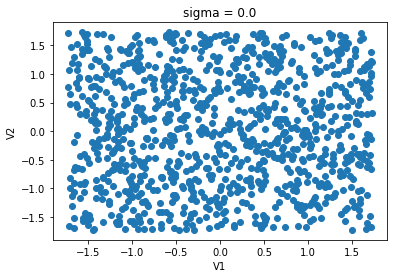

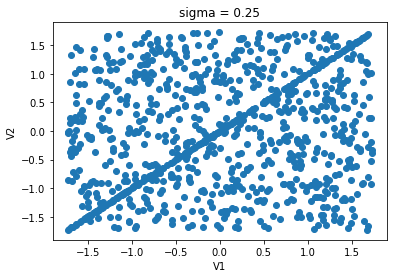

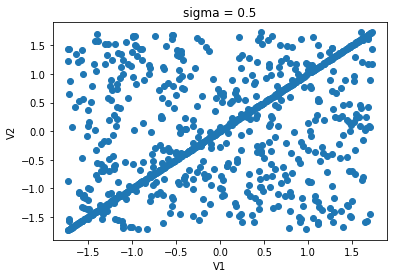

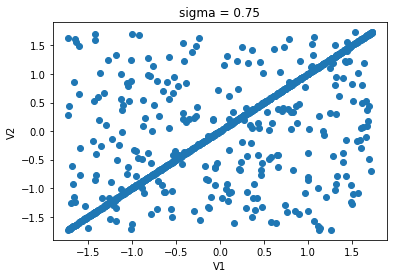

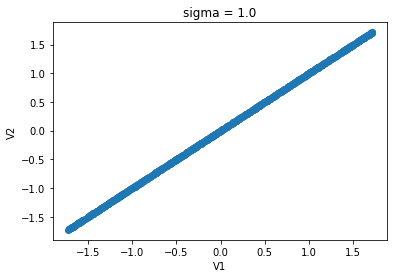

In [19]:
correlations = np.array([0, 0.25, 0.5, 0.75, 1])
def generate_corr_unif(correlations):
    rvs = {}
    for corr in correlations:
        v1 = np.random.uniform(-np.sqrt(3), np.sqrt(3), 1000)
        x2 = np.random.uniform(-np.sqrt(3), np.sqrt(3), 1000)
        b = np.random.choice([0, 1], size = 1000, p = [corr, 1 - corr])
        v2 = np.where(b == 0, v1, x2)
        rvs[corr] = (v1, v2)
        
        plt.scatter(v1, v2)
        plt.xlabel("V1")
        plt.ylabel("V2")
        plt.title("sigma = " + str(corr))
        plt.show()
        
    return rvs
    
ans = generate_corr_unif(correlations)

<hr>

**(e)** Using the above function, compute $\mathbb{P}[V_1\leq 0,V_2\leq 0]$ for the case when $\sigma_{12}=0.5$ (in a financial application, this can correspond to *both* $V_1$ and $V_2$ 'defaulting').

<hr>

## Ans.

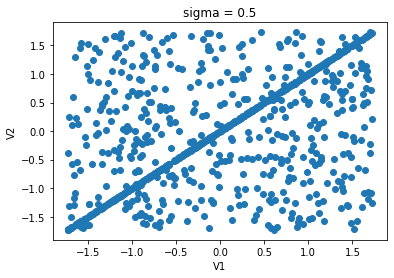

In [14]:
generated_rvs = generate_corr_unif([0.5])

In [20]:
v1 = generated_rvs[0.5][0]
v2 = generated_rvs[0.5][1]
print("Probability = ", np.mean((v1 <= 0) & (v2 <= 0)))

Probability =  0.391


<hr>

**(f)** The Gaussian copula trick is based on first generating a multivariate normal vector with given covariance matrix $\Sigma$, and then using inversion to convert it to a vector of uniform rvs, which can then used to generate the desired rvs. We now demonstrate this in the above setting.

Let $\phi(\cdot)$ denote the 1-d normal cdf. Generate $(Z_1,Z_2)$ as multivariate normals with covariance
$\Sigma =\begin{pmatrix}
		1 & 0.5 \\
		0.5 & 1
	\end{pmatrix}$,
and define $W_1 = \alpha + (\beta-\alpha)\phi(Z_1)$ and $W_2 = \alpha + (\beta-\alpha)\phi(Z_2)$.

Argue $W_1$, $W_2$ are uniform on $[\alpha,\beta]$ (and hence $\mathbb{E}[W_1]=\mathbb{E}[W_2]=0,Var(W_1)=Var(W_2)=1$). Next, for $\sigma_{12}=0.5$ and $\alpha,\beta$ as above, write a function to generate $W_1,W_2$ as described, and use these to plot the scatter plot, and compute $\mathbb{P}[W_1\geq 0,W_2\geq 0]$.

<hr>

## Ans.


In [21]:
from scipy.stats import norm

In [25]:
def copula_trick(n, sigma, A):
    bivariate = {}
    corr = sigma[0, 1]
    N = np.random.normal(size = (2, n))
    Z = A @ N
    alpha = -np.sqrt(3)
    beta = np.sqrt(3)
    W1 = alpha + (beta - alpha) * norm.cdf(Z[0])
    W2 = alpha + (beta - alpha) * norm.cdf(Z[1])
    bivariate[corr] = (W1, W2)
    
    plt.scatter(W1, W2)
    plt.xlabel('W1')
    plt.ylabel('W2')
    plt.title('corr = ' + str(corr))
    plt.show()
    
    return bivariate

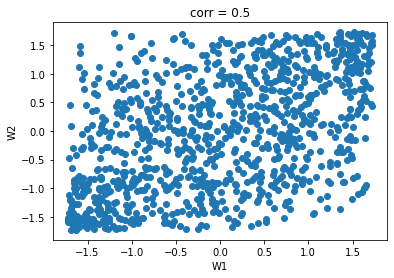

In [26]:
sigma = np.array([[1, 0.5],
              [0.5, 1]])
A = np.array([[1, 0],
              [0.5, np.sqrt(3/4)]])
vector = copula_trick(1000, sigma, A)



In [29]:
w1 = vector[0.5][0]
w2 = vector[0.5][1]
prob = np.mean((w1 >= 0) & (w2 >= 0))
print("Prob =", prob)

Prob = 0.333
